<a href="https://colab.research.google.com/github/Prathamgupta19/pratham/blob/main/dataanalysis_camsat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_csv('/content/edited_data_cansat.csv')

In [12]:
data.head()

,Altitude,Pressure,Temprature,Latitude,Longitude,Humidity,SMOKE,AQI,temperature_correct,iteration
0,0.25,1003.37,45.83,0.0,0.0,21.29,354,219,45.828375,1
1,1.59,1003.22,45.84,0.0,0.0,21.28,354,219,45.819665,2
2,3.11,1003.06,45.85,0.0,0.0,21.27,354,219,45.809785,3
3,4.53,1002.88,45.86,0.0,0.0,21.26,354,219,45.800555,4
4,6.21,1002.71,45.87,0.0,0.0,21.25,354,219,45.789635,5


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Altitude             582 non-null    float64
 1   Pressure             582 non-null    float64
 2   Temprature           582 non-null    float64
 3   Latitude             582 non-null    float64
 4   Longitude            582 non-null    float64
 5   Humidity             750 non-null    float64
 6   SMOKE                750 non-null    int64  
 7   AQI                  750 non-null    int64  
 8   temperature_correct  582 non-null    float64
 9   iteration            750 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 58.7 KB


In [14]:
data.isnull().sum()

Altitude               168
Pressure               168
Temprature             168
Latitude               168
Longitude              168
Humidity                 0
SMOKE                    0
AQI                      0
temperature_correct    168
iteration                0
dtype: int64

In [15]:
data.describe()

,Altitude,Pressure,Temprature,Latitude,Longitude,Humidity,SMOKE,AQI,temperature_correct,iteration
count,582.000000,582.000000,582.000000,582.000000,582.000000,750.000000,750.000000,750.000000,582.000000,750.00000
mean,386.143196,958.363093,46.808677,21.485322,67.391310,18.204227,336.016000,221.857333,43.320069,375.50000
std,222.601162,25.562901,1.375352,5.919821,18.568235,3.086890,14.952788,12.851817,1.446908,216.65064
min,0.080000,917.380000,42.030000,0.000000,0.000000,13.680000,307.000000,203.000000,40.974240,1.00000
25%,195.082500,936.192500,46.192500,23.113600,72.498600,15.670000,329.000000,213.000000,42.068613,188.25000
50%,387.735000,957.905000,47.080000,23.113600,72.498600,17.100000,341.000000,217.000000,43.309722,375.50000
75%,578.675000,980.222500,47.777500,23.113600,72.498600,20.970000,348.000000,236.000000,44.561964,562.75000
max,747.040000,1003.370000,48.740000,23.113600,72.498600,24.320000,354.000000,263.000000,45.829480,750.00000


In [21]:
data = data.drop(['Temprature'] , axis = 1 )

In [23]:
data.head()

,Altitude,Pressure,Latitude,Longitude,Humidity,SMOKE,AQI,temperature_correct,iteration
0,0.25,1003.37,0.0,0.0,21.29,354,219,45.828375,1
1,1.59,1003.22,0.0,0.0,21.28,354,219,45.819665,2
2,3.11,1003.06,0.0,0.0,21.27,354,219,45.809785,3
3,4.53,1002.88,0.0,0.0,21.26,354,219,45.800555,4
4,6.21,1002.71,0.0,0.0,21.25,354,219,45.789635,5


In [24]:
data.rename(columns = {'temperature_correct' : 'Temperature'} , inplace = True )

In [25]:
data.head()

,Altitude,Pressure,Latitude,Longitude,Humidity,SMOKE,AQI,Temperature,iteration
0,0.25,1003.37,0.0,0.0,21.29,354,219,45.828375,1
1,1.59,1003.22,0.0,0.0,21.28,354,219,45.819665,2
2,3.11,1003.06,0.0,0.0,21.27,354,219,45.809785,3
3,4.53,1002.88,0.0,0.0,21.26,354,219,45.800555,4
4,6.21,1002.71,0.0,0.0,21.25,354,219,45.789635,5


In [26]:
data.describe()

,Altitude,Pressure,Latitude,Longitude,Humidity,SMOKE,AQI,Temperature,iteration
count,582.000000,582.000000,582.000000,582.000000,750.000000,750.000000,750.000000,582.000000,750.00000
mean,386.143196,958.363093,21.485322,67.391310,18.204227,336.016000,221.857333,43.320069,375.50000
std,222.601162,25.562901,5.919821,18.568235,3.086890,14.952788,12.851817,1.446908,216.65064
min,0.080000,917.380000,0.000000,0.000000,13.680000,307.000000,203.000000,40.974240,1.00000
25%,195.082500,936.192500,23.113600,72.498600,15.670000,329.000000,213.000000,42.068613,188.25000
50%,387.735000,957.905000,23.113600,72.498600,17.100000,341.000000,217.000000,43.309722,375.50000
75%,578.675000,980.222500,23.113600,72.498600,20.970000,348.000000,236.000000,44.561964,562.75000
max,747.040000,1003.370000,23.113600,72.498600,24.320000,354.000000,263.000000,45.829480,750.00000


In [28]:
sns.set()

<function matplotlib.pyplot.show(close=None, block=None)>

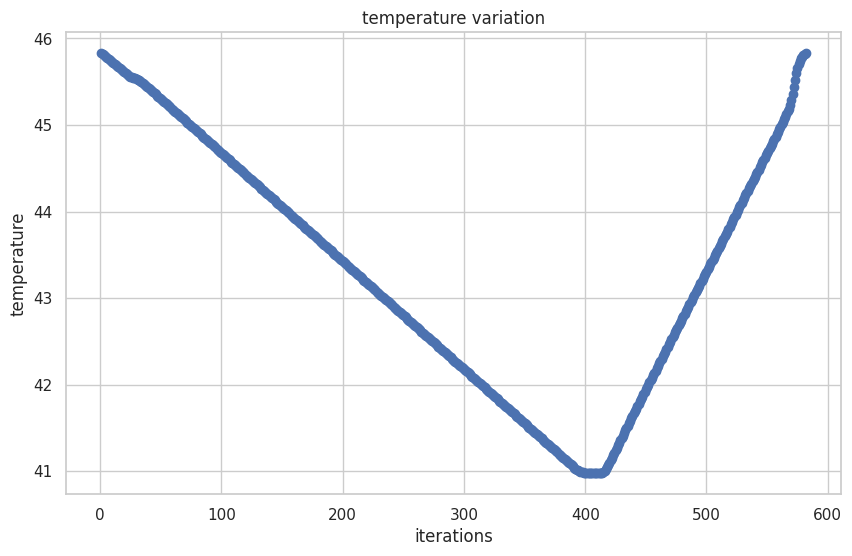

In [31]:
plt.figure(figsize = (10,6))
plt.plot(data['iteration'] , data['Temperature'],  marker='o', linestyle='-')
plt.title('temperature variation')
plt.xlabel('iterations')
plt.ylabel('temperature')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

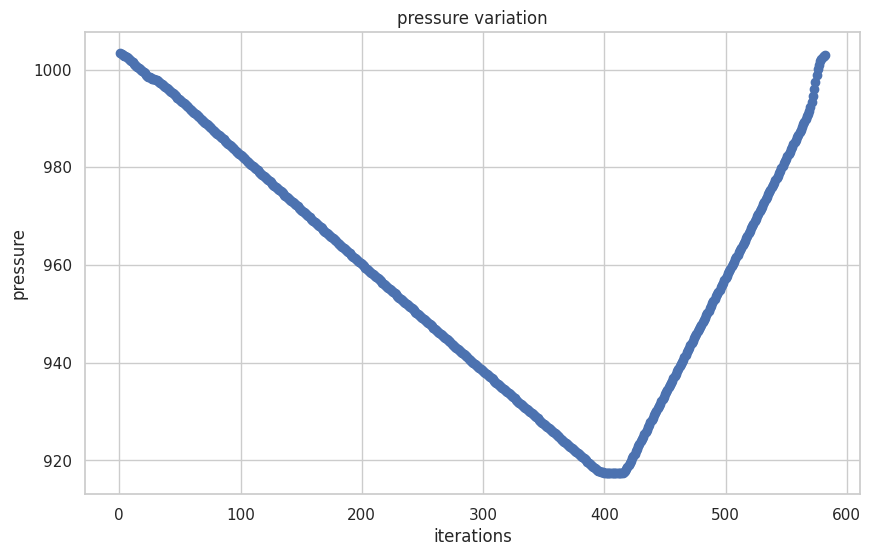

In [32]:
plt.figure(figsize = (10,6))
plt.plot(data['iteration'] , data['Pressure'],  marker='o', linestyle='-')
plt.title('pressure variation')
plt.xlabel('iterations')
plt.ylabel('pressure')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

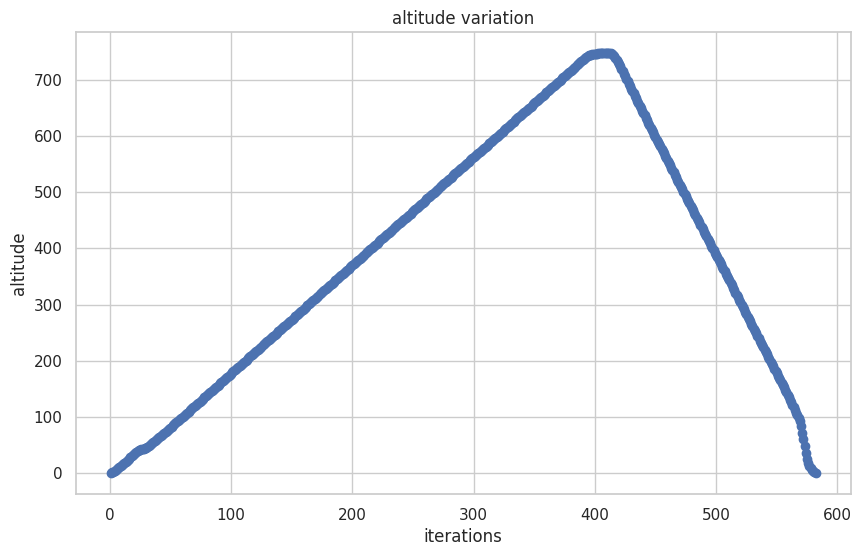

In [33]:
plt.figure(figsize = (10,6))
plt.plot(data['iteration'] , data['Altitude'],  marker='o', linestyle='-')
plt.title('altitude variation')
plt.xlabel('iterations')
plt.ylabel('altitude')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

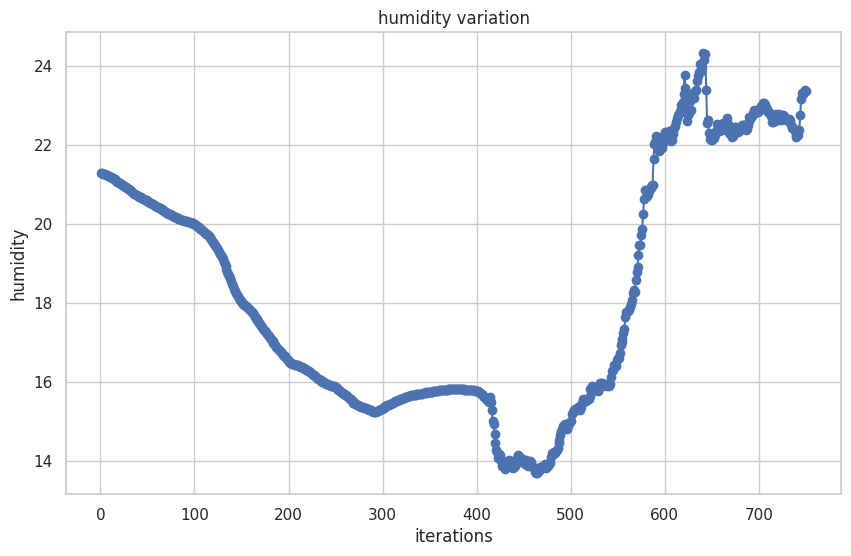

In [34]:
plt.figure(figsize = (10,6))
plt.plot(data['iteration'] , data['Humidity'],  marker='o', linestyle='-')
plt.title('humidity variation')
plt.xlabel('iterations')
plt.ylabel('humidity')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


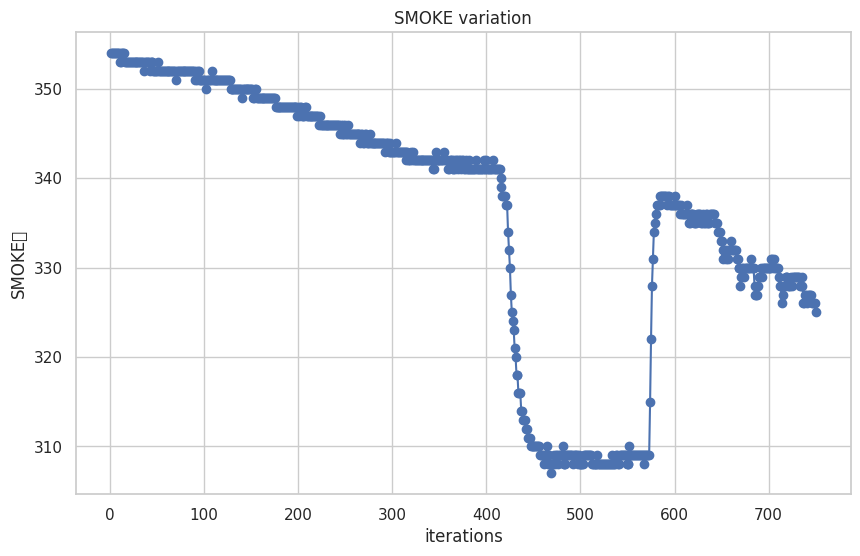

In [36]:
plt.figure(figsize = (10,6))
plt.plot(data['iteration'] , data['SMOKE'],  marker='o', linestyle='-')
plt.title('SMOKE variation')
plt.xlabel('iterations')
plt.ylabel('SMOKE	')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

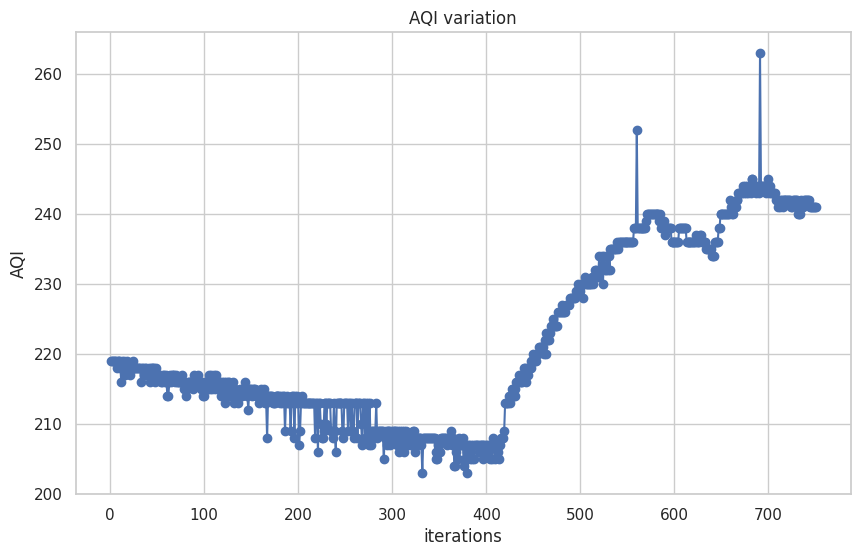

In [37]:
plt.figure(figsize = (10,6))
plt.plot(data['iteration'] , data['AQI'],  marker='o', linestyle='-')
plt.title('AQI variation')
plt.xlabel('iterations')
plt.ylabel('AQI')
plt.grid(True)
plt.show

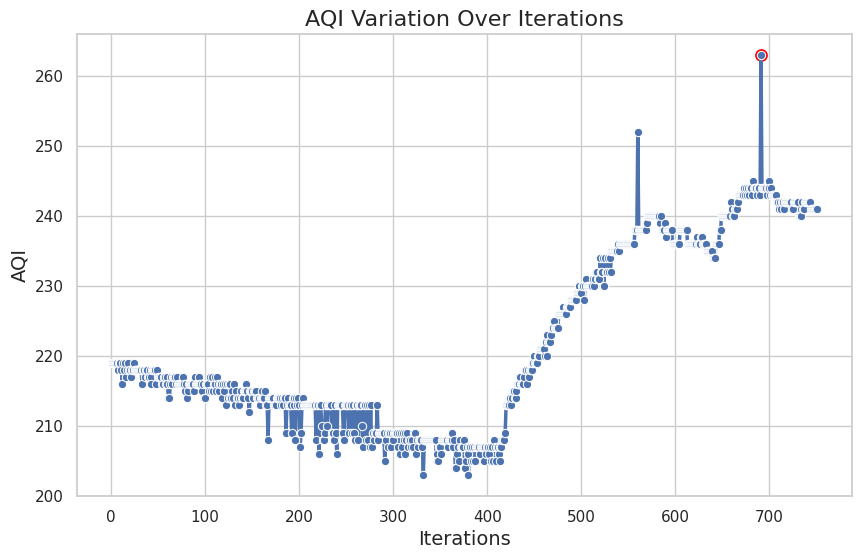

In [40]:

# Set the style
sns.set(style='whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='iteration', y='AQI', data=data, marker='o', linewidth=2.5)

# Customize the title and labels
plt.title('AQI Variation Over Iterations', fontsize=16)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('AQI', fontsize=14)

# Highlight a specific point (e.g., the highest AQI)
highlight = data[data['AQI'] == data['AQI'].max()]
sns.scatterplot(x='iteration', y='AQI', data=highlight, color='red', s=100)

# Show the grid
plt.grid(True)

<function matplotlib.pyplot.show(close=None, block=None)>

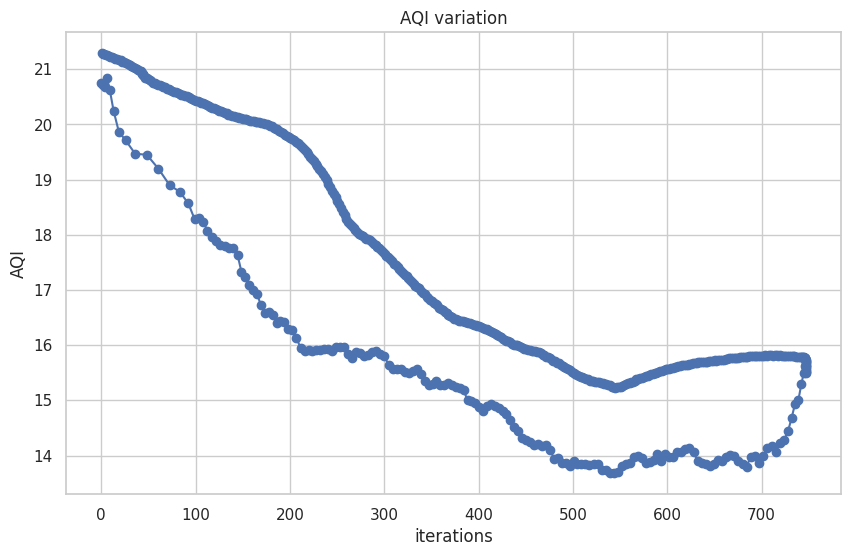

In [41]:
plt.figure(figsize = (10,6))
plt.plot(data['Altitude'] , data['Humidity'],  marker='o', linestyle='-')
plt.title('AQI variation')
plt.xlabel('iterations')
plt.ylabel('AQI')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

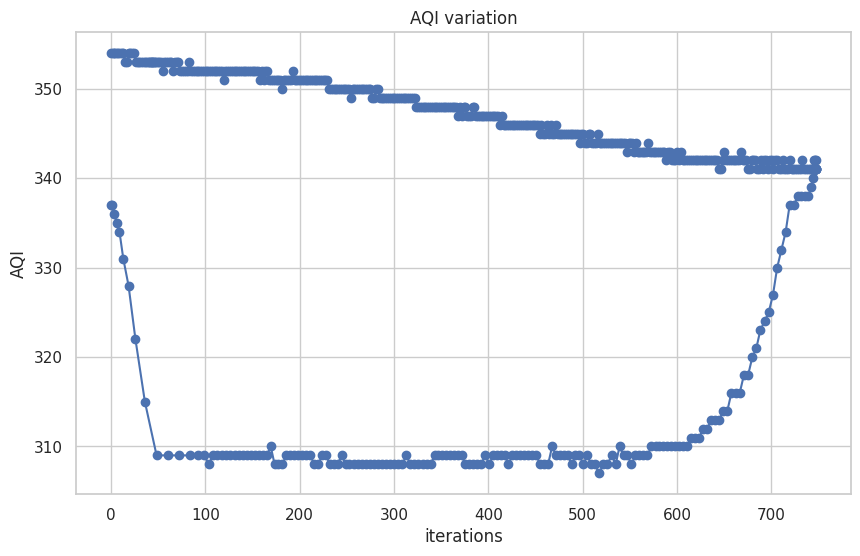

In [42]:
plt.figure(figsize = (10,6))
plt.plot(data['Altitude'] , data['SMOKE'],  marker='o', linestyle='-')
plt.title('AQI variation')
plt.xlabel('iterations')
plt.ylabel('AQI')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

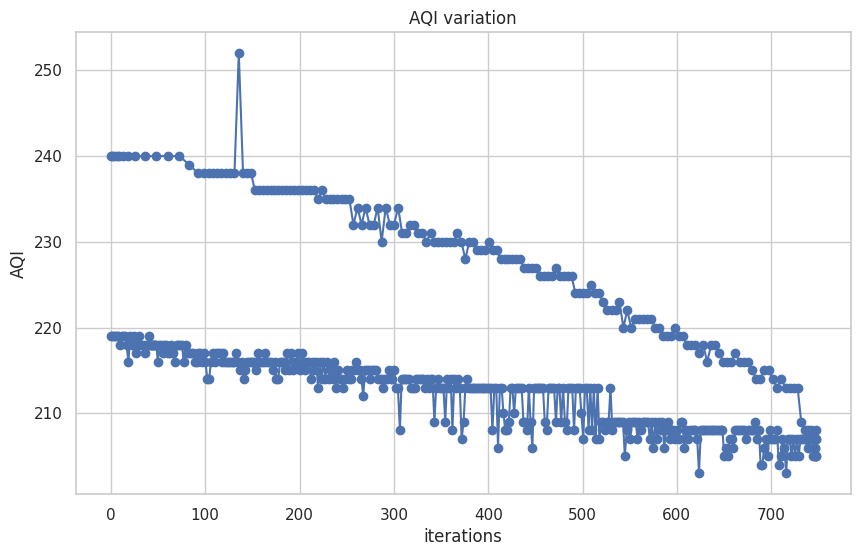

In [43]:
plt.figure(figsize = (10,6))
plt.plot(data['Altitude'] , data['AQI'],  marker='o', linestyle='-')
plt.title('AQI variation')
plt.xlabel('iterations')
plt.ylabel('AQI')
plt.grid(True)
plt.show